In [105]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from collections import defaultdict

In [106]:
df = pd.read_csv('data/final_legal_df.csv', index_col=0)

In [107]:
df.head()

,case_id,decision_date,case_citation_name,court,citations,clean_text,keywords,summs,d2v_scores,lda_preds
0,2747110,1771,2 Ill. App. 3d 538,Illinois Appellate Court,"['1 and 119', '89 S.Ct. 2100', '395 U.S. 959']",mr presiding justice eberspacher delivered opi...,"['sentenced', 'sentence', 'sentencing', 'court...",The court entered judgment upon the verdict an...,1.306400,4
1,435537,1819,1 Ill. 21,Illinois Supreme Court,NaN,opinion court wa criminal prosecution riot pla...,"['indictment', 'form', 'criminal', 'shall', 'y...","This was a criminal prosecution for a riot, ag...",1.451599,4
2,435638,1819,1 Ill. 19,Illinois Supreme Court,"['2 Dall, 302']",opinion court wa action debt judgment rendered...,"['action', 'court', 'judgment', 'plea', 'nil']",Opinion of the Court.This was an action of deb...,0.455963,3
3,435690,1819,1 Ill. 17,Illinois Supreme Court,NaN,opinion court wa action covenant fifth plea st...,"['plea', 'court', 'post', 'failure', 'illinois']",Opinion of the Court.This was an action of cov...,0.994830,3
4,435710,1819,1 Ill. 19,Illinois Supreme Court,NaN,opinion court appears record cause writ issued...,"['court appears', 'scam', 'appearance', 'appea...","It appears from the record in this cause, that...",0.522237,3


In [108]:
df['citations'] = df.citations.apply(lambda citations: np.nan if citations==[] else citations)

In [109]:
clean_citations = []

for item in df.citations:
    clean_citations.append(re.findall(r'\d+\sIll.\s\d+', str(item)))

In [110]:
df['citations'] = clean_citations

In [111]:
df.head(2)

,case_id,decision_date,case_citation_name,court,citations,clean_text,keywords,summs,d2v_scores,lda_preds
0,2747110,1771,2 Ill. App. 3d 538,Illinois Appellate Court,[],mr presiding justice eberspacher delivered opi...,"['sentenced', 'sentence', 'sentencing', 'court...",The court entered judgment upon the verdict an...,1.306400,4
1,435537,1819,1 Ill. 21,Illinois Supreme Court,[],opinion court wa criminal prosecution riot pla...,"['indictment', 'form', 'criminal', 'shall', 'y...","This was a criminal prosecution for a riot, ag...",1.451599,4


In [112]:
df['citations'] = df.citations.apply(lambda citations: np.nan if citations==[] else citations)

In [113]:
df.shape

(183149, 10)

In [114]:
df.tail(2)

,case_id,decision_date,case_citation_name,court,citations,clean_text,keywords,summs,d2v_scores,lda_preds
183147,7328871,2011,409 Ill. App. 3d 1079,Illinois Appellate Court,NaN,justice turner delivered judgment court opinio...,"['defendant', 'fine', 'court', 'section', 'sta...","At a November 2009 stipulated bench trial, the...",0.636557,1
183148,7328886,2011,409 Ill. App. 3d 1101,Illinois Appellate Court,NaN,presiding justice knecht delivered judgment co...,"['estate', 'fee', 'petitioner', 'court', 'atto...",Petitioners assert the court erroneously concl...,-3.478325,1


In [115]:
df = df.dropna(subset=['citations'])

In [116]:
law_citations_df = df[['case_citation_name', 'citations', 'lda_preds']]

In [117]:
law_citations_df = law_citations_df.reset_index()
law_citations_df = law_citations_df.drop(columns=['index'])

In [118]:
law_citations_df.head()

,case_citation_name,citations,lda_preds
0,1 Ill. 54,"[24 Ill, 60]",3
1,1 Ill. 66,"[15 Ill, 56]",3
2,1 Ill. 401,[13 Ill. 599],3
3,12 Ill. 173,"[11 Ill, 624]",3
4,13 Ill. 59,[11 Ill. 332],3


In [119]:
law_citations_df.shape

(98887, 3)

In [120]:
law_citations_df['citations'][11999]

['45 Ill. 62', '71 Ill. 524', '11 Ill. 445', '63 Ill. 348']

In [137]:
graph = dict(zip(df.case_citation_name, df.citations))

In [138]:
def generate_edges(graph):
    
    edges = []
    
    for node in graph:
        try:
            for neighbour in graph[node]:
                edges.append((node, neighbour))
        except:
            pass
    return edges

In [139]:
edges = generate_edges(graph)

In [140]:
edges = list(set(edges))

In [141]:
edges[:10]

[('253 Ill. App. 252', '225 Ill. 21'),
 ('54 Ill. 2d 173', '275 Ill. 503'),
 ('92 Ill. App. 3d 916', '63 Ill. 2'),
 ('214 Ill. App. 3d 47', '104 Ill. 2'),
 ('403 Ill. 503', '381 Ill. 106'),
 ('266 Ill. App. 3d 680', '142 Ill. 2'),
 ('277 Ill. App. 3d 744', '157 Ill. 2'),
 ('157 Ill. App. 105', '164 Ill. 58'),
 ('391 Ill. 492', '356 Ill: 104'),
 ('394 Ill. 617', '346 Ill. 223')]

# Creating a Graph with Networkx

In [146]:
import networkx as nx

In [147]:
G = nx.DiGraph()
G.add_edges_from(edges)

print(G.number_of_edges())
print(G.number_of_nodes())

407558
115929


In [148]:
deg = dict(G.degree())

In [149]:
to_remove = [n for n in deg if deg[n] == 1]

In [150]:
len(to_remove)

28186

In [151]:
G.remove_nodes_from(to_remove)

In [152]:
G.number_of_nodes()

87743

In [ ]:
pos=nx.spring_layout(G)

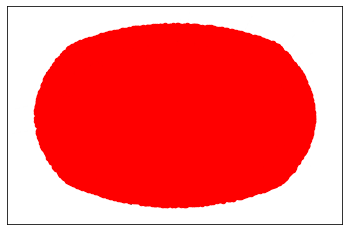

In [43]:
nx.draw_networkx(G, pos, edges=True, with_labels=False, node_size=20, width=.1, node_color='red', edge_color = 'black')
plt.show()

In [44]:
#Most cited cases
sorted(deg.items(), key = lambda x: x[1], reverse=True)[:10]

[('66 Ill. 2', 2205),
 ('63 Ill. 2', 2053),
 ('68 Ill. 2', 1895),
 ('79 Ill. 2', 1835),
 ('37 Ill. 2', 1778),
 ('74 Ill. 2', 1770),
 ('82 Ill. 2', 1681),
 ('60 Ill. 2', 1638),
 ('54 Ill. 2', 1614),
 ('76 Ill. 2', 1569)]

In [47]:
cases_cited_over_100 = [n for n in deg if deg[n] > 100] 
len(cases_cited_over_100)

165

In [46]:
[case for case in cases_cited_over_100 if case in df.case_citation_name]

[]

# Graphs by LDA groupings

In [48]:
df['lda_preds'].value_counts()

3    78957
1    28523
2    26264
5    24814
4    24591
Name: lda_preds, dtype: int64

In [49]:
df_lda1 = df[df.lda_preds == 1]

In [50]:
df_lda1 = df_lda1[['case_citation_name', 'citations']]

In [51]:
graph1 = dict(zip(df_lda1.case_citation_name, df_lda1.citations))

In [52]:
edges1 = generate_edges(graph1)

In [53]:
edges1 = list(set(edges1))

In [54]:
G1 = nx.DiGraph()
G1.add_edges_from(edges1)

G1.number_of_edges()

55994

In [55]:
deg1 = dict(G1.degree())
to_remove = [n for n in deg if deg[n] == 1]

In [56]:
len(to_remove)

28125

In [57]:
G1.remove_nodes_from(to_remove)

In [58]:
pos=nx.spring_layout(G1)

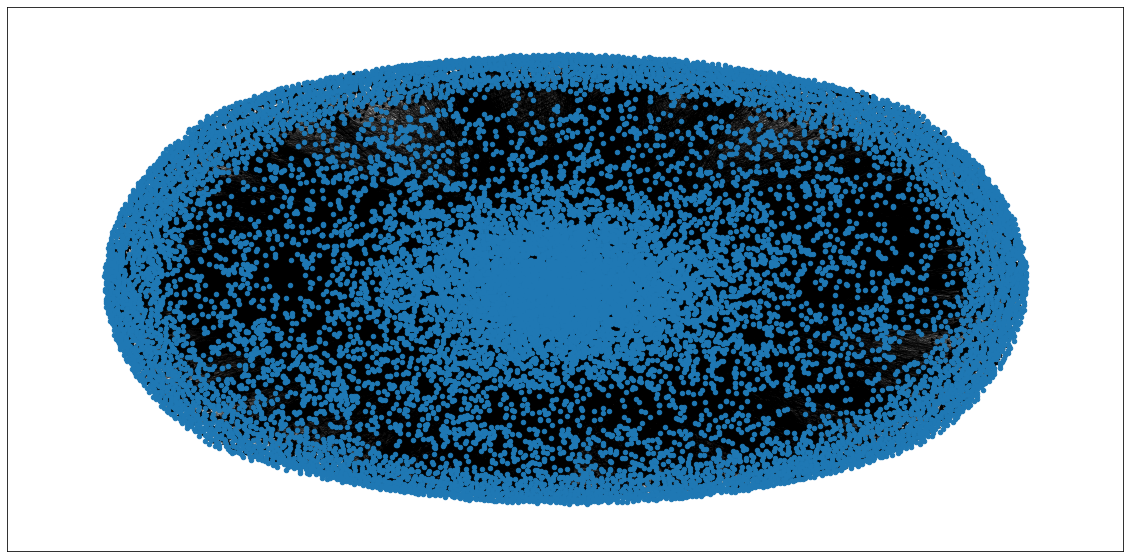

In [59]:
plt.figure(figsize=(20,10))
nx.draw_networkx(G1, pos, edges=True, with_labels=False, node_size=20, width=.1, cmap='magma', edge_color = 'black')
plt.show()

In [64]:
deg1 = dict(G1.degree())
to_remove = [n for n in deg if deg[n] < 20]

In [65]:
G1.remove_nodes_from(to_remove)

In [66]:
pos=nx.spring_layout(G1)

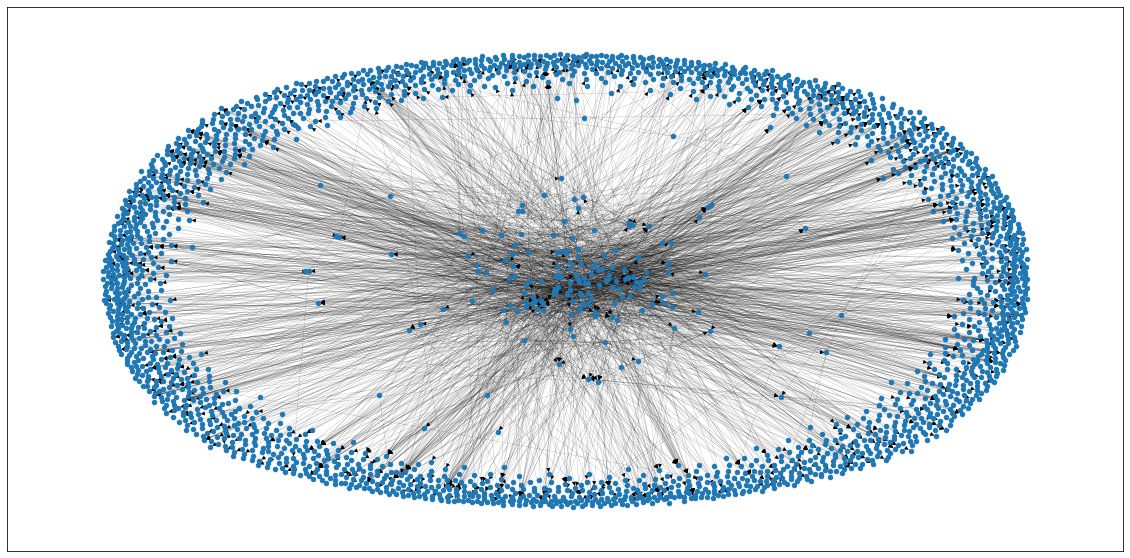

In [67]:
plt.figure(figsize=(20,10))
nx.draw_networkx(G1, pos, edges=True, with_labels=False, node_size=20, width=.1, cmap='magma', edge_color = 'black')
plt.show()

In [70]:
def directed_graph_by_lda_group(group_num):
    
    new_df = df[df.lda_preds == group_num]
    new_df = new_df[['case_citation_name', 'citations']]
    new_graph = dict(zip(new_df.case_citation_name, new_df.citations))
    
    new_edges = generate_edges(new_graph)
    new_edges = list(set(new_edges))
    
    new_G = nx.DiGraph()
    new_G.add_edges_from(new_edges)
    print(new_G.number_of_edges())
    
    deg_dict = dict(new_G.degree())
    remove_list = [n for n in deg_dict if deg_dict[n] < 5]
    print(len(remove_list))
    new_G.remove_nodes_from(remove_list)
    
    new_pos = nx.spring_layout(new_G)
    
    plt.figure(figsize=(20,10))
    nx.draw_networkx(new_G, pos=new_pos, edges=True, with_labels=False, node_size=20, width=.1, cmap='magma', node_color='black', edge_color = 'red')
    plt.show()

44173
13901


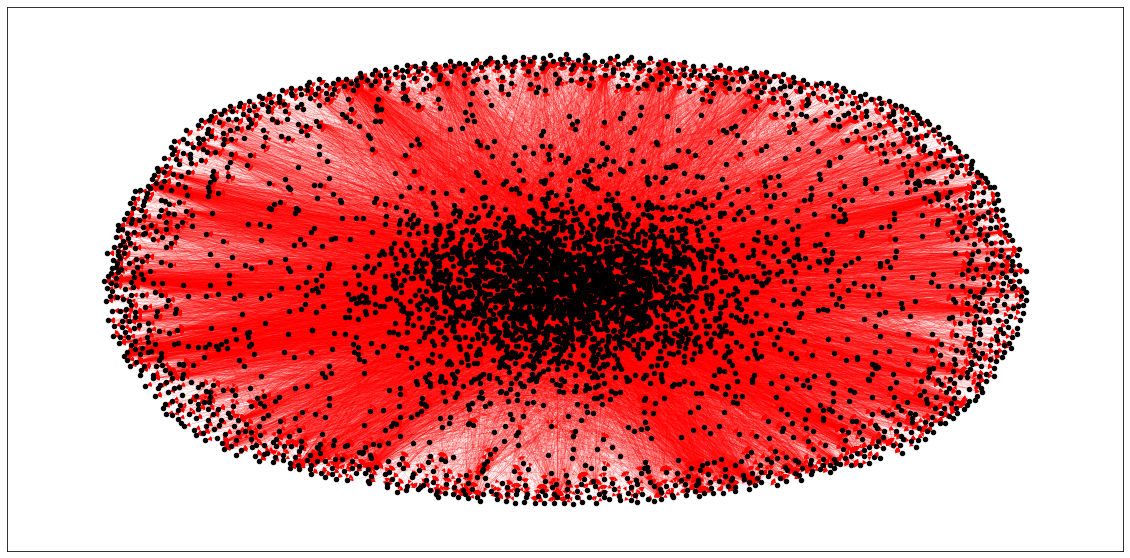

In [71]:
directed_graph_by_lda_group(2)

166048
34159


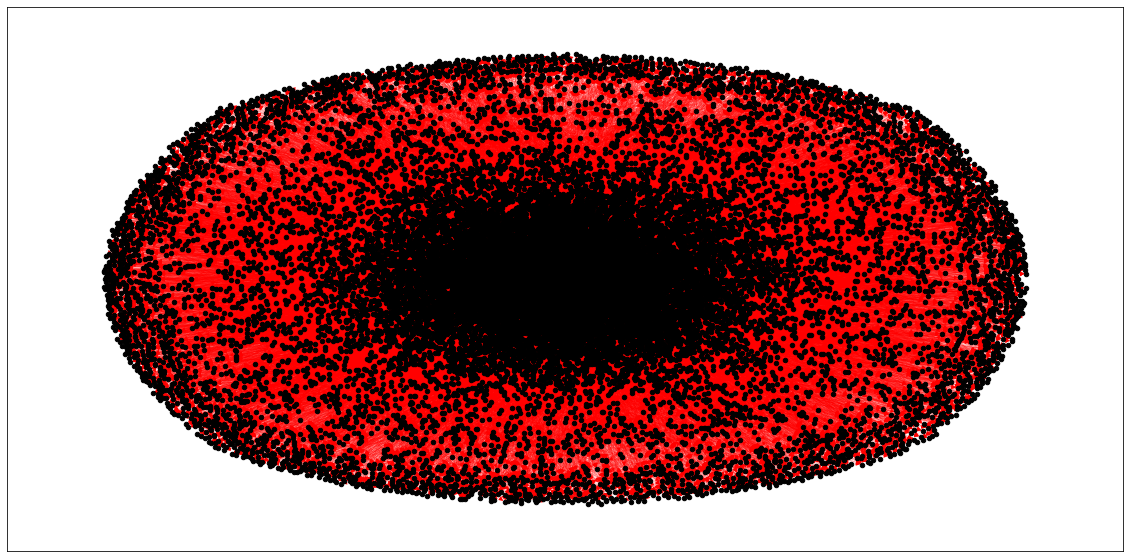

In [72]:
directed_graph_by_lda_group(3)

8353
6779


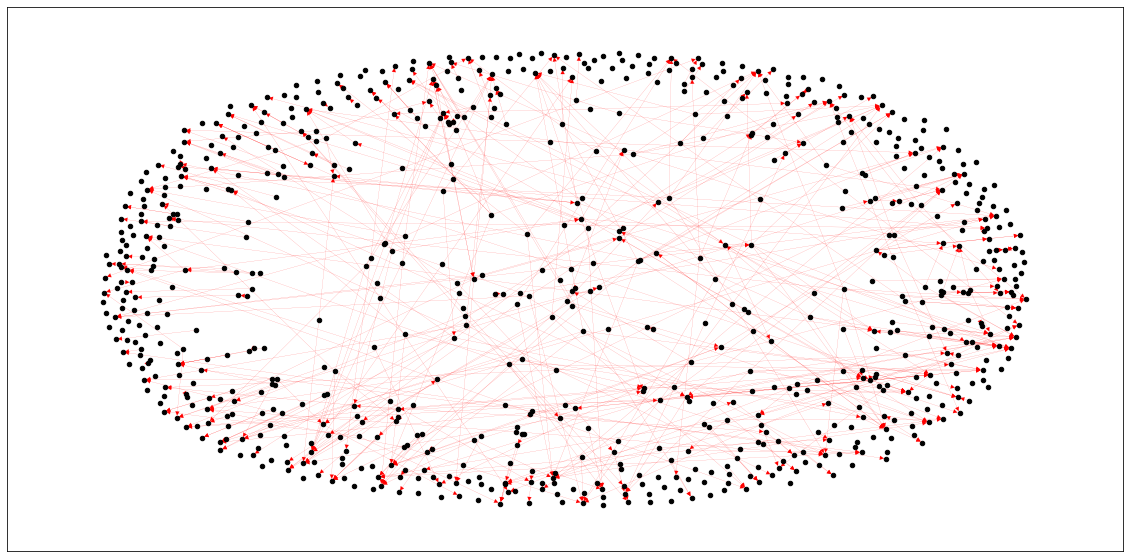

In [342]:
directed_graph_by_lda_group(4)

9940
5382


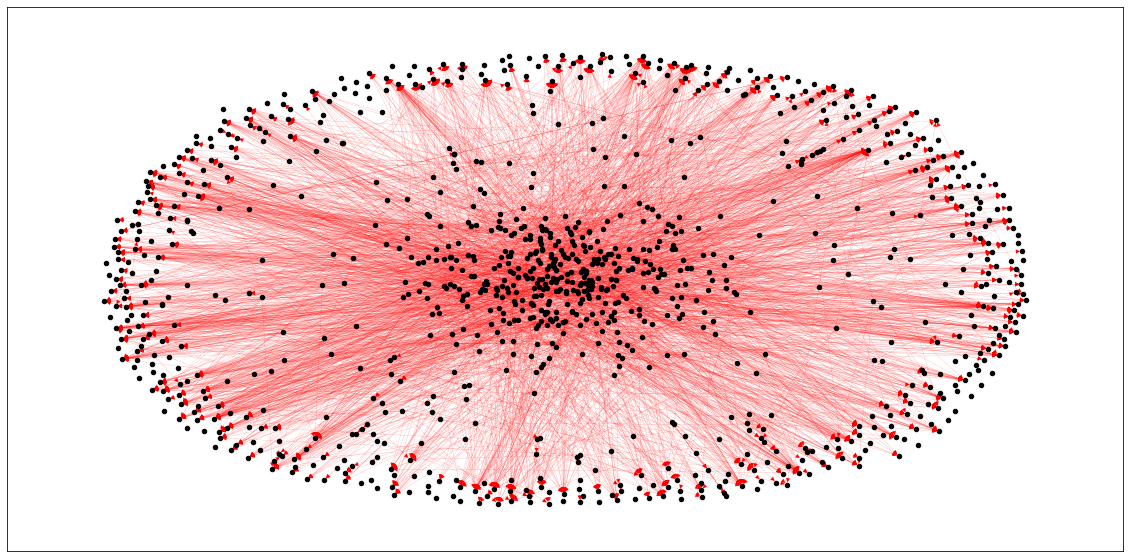

In [343]:
directed_graph_by_lda_group(5)

In [ ]:
for key, value in graph.items():
    if 'd' in value:
        print(key)
        
sp = nx.all_pairs_shortest_path(graph)
sp['b']['d']


In [222]:
def find_all_paths(graph, start, end, path =[]): 
    
    path = path + [start] 
    
    if start == end: 
        return [path] 
    
    paths = [] 
    
    for node in graph[start]: 
        if node not in path: 
            newpaths = find_all_paths(graph, node, end, path) 
        for newpath in newpaths: 
            paths.append(newpath) 

    return paths 

In [223]:
print(find_all_paths(graph, '31 Ill. 153', '24 Ill. 623'))

KeyError: '13 Ill. 671'

In [87]:
# legal_cases = df.case_citation_name.tolist()

In [98]:
# law_citations_dictionary = dict.fromkeys(legal_cases, 0)

In [73]:
# legal_citations_dict = df.citations.to_dict()
# legal_citations_dict

{0: nan,
 1: nan,
 2: nan,
 3: nan,
 4: nan,
 5: "['1 Scam. 266']",
 6: "['13 Edward 1']",
 7: nan,
 8: nan,
 9: "['3 Wend. 418', '4 Wend. 514', '11 Wend. 83']",
 10: nan,
 11: "['0 Peters 478', '6 Peters 729', '4 Peters 47']",
 12: nan,
 13: nan,
 14: "['7 Mass. 186', '17 Johns. 446']",
 15: "['2 Scam. 78', '4 Scam. 547', '3 Scam. 193']",
 16: "['1836 and 1837', '1 Gall. 630', '107 to 115', '1 Metc. 212', '3 Pick. 149', '7 Peters, 464', '11 Mass. 475', '10 Johns. 129', '3 Scam. 305', '4 Pick. 253', '5 do. 393', '1 Dana, 166', '4 Bibb, 78', '4 Paige, 220', '8 Wend. 620', '15 Wend. 588', '13 Johns. 471', '11 Johns. 230', '8 Wend. 628', '13 Johns. 471', '15 Wend. 594', '6 Wend. 226', '4 Pick. 252', '3 do. 149', '1 Metc. 212', '10 Pick. 72', '7 Peters, 464', '11 Mass. 475', '1 Metc. 214', '2 Scam. 499']",
 17: "['10 Peters, 257', '10 Johns. 587', '3 Metcalf, 255', '11 Wend. 312']",
 18: "['3 Scam. 536', '19 Johns. 324', '18 Johns. 493']",
 19: nan,
 20: "['3 Scam. 347']",
 21: nan,
 22: "

In [ ]:
data[data.decision_year == 1979]
data[data.judge_name == 'mr. justice guild']

In [ ]:
graph = { "a" : ["c"],
          "b" : ["c", "e"],
          "c" : ["a", "b", "d", "e"],
          "d" : ["c"],
          "e" : ["c", "b"],
          "f" : []
        } 

In [ ]:
def generate_edges(graph):
    
    edges = []
    
    for node in graph:
        for neighbour in graph[node]:
            edges.append((node, neighbour))
            
    return edges

In [ ]:
generate_edges(graph)

In [ ]:
graph ={ 
'a':['c'], 
'b':['d'], 
'c':['e'], 
'd':['a', 'd'], 
'e':['b', 'c'] 
} 

In [ ]:
def find_path(graph, start, end, path =[]): 
    path = path + [start] 
    if start == end: 
        return path 
    for node in graph[start]: 
        if node not in path: 
            newpath = find_path(graph, node, end, path) 
            if newpath:  
                return newpath 
    
    return None

In [ ]:
print(find_path(graph, 'd', 'c'))

In [ ]:
def find_all_paths(graph, start, end, path =[]): 
    
    path = path + [start] 
    
    if start == end: 
        return [path] 
    
    paths = [] 
    
    for node in graph[start]: 
        if node not in path: 
            newpaths = find_all_paths(graph, node, end, path) 
        for newpath in newpaths: 
            paths.append(newpath) 

    return paths 

In [ ]:
print(find_all_paths(graph, 'd', 'c'))

In [ ]:
# function to find the shortest path 
def find_shortest_path(graph, start, end, path =[]): 
    path = path + [start] 
    
    if start == end: 
        return path 
    
    shortest = None
    for node in graph[start]: 
        if node not in path: 
            newpath = find_shortest_path(graph, node, end, path) 
                
            if newpath: 
                if not shortest or len(newpath) < len(shortest): 
                    shortest = newpath 
        return shortest 

In [ ]:
find_shortest_path(graph, 'd', 'c')

In [ ]:
graph = defaultdict(list)

def add_edge(graph, u, v):
    graph[u].append(v)

def generate_edges(graph):
    
    edges = []
    
    for node in graph:
        for neighbour in graph[node]:
            edges.append((node, neighbour))
            
    return edges